# Limpieza de datos para crear gráficos descriptivos y modelo de ML

Nos dan un dataset con información relativa da distintas películas y el número de likes que han recibido en Facebook y Twitter. Nos piden:

1. Preparar el dataset para crear un modelo de ML que nos permita predecir el número de likes a partir de las características de las películas.
2. Además del modelo, necesitaremos presentar algunos gráficos a nuestros stakeholders. Es necesario que la data este preparada para ello.
3. Identificar problemas graves en la data y comunicarlos lo antes posible.
4. Adicionalmente, nuestro stakeholder tiene "curiosidad" por algunas cifras:
    - Actores más repetidos en el dataset
    - Géneros de películas más comunes
    - Relación entre presupuesto y recaudación

## Diccionario de datos

Esta es la información provista:

- **color**: Variable categórica que representa si la película es a color on en blanco y negro. 
- **director_name**: Nombre del director.
- **duration**: Duración de la película.
- **gross**: Recaudación en taquilla de la película.
- **genres**: Géneros de la película.
- **movie_title**: Título de la película.
- **title_year**: Año de lanzamiento de la película.
- **language**: Idioma de la película.
- **country**: País de origen de la película.
- **budget**: Presupuesto de la película.
- **imdb_score**: Valoración en IMDB.
- **actors**: Actores de la película.
- **movie_facebook_likes**: Likes recibidos en Facebook.
- **movie_twitter_likes**: Likes recibidos en twitter.

## Leer datos

In [1]:
import pandas as pd
import numpy as np

df_imdb = pd.read_csv("data/imdb_clase.csv", sep=";", index_col=0)

In [2]:
df_imdb.sample(5).T

,42,62,45,21,82
color,Color,Color,Black and White,Color,Color
director_name,Michael Patrick King,Timur Bekmambetov,Steven Spielberg,Tom Hooper,NaN
duration,146,141,146,158,137
gross,"$95,328,937.00",$nan,"$79,883,359.00","$148,775,460.00","$37,304,950.00"
genres,Comedy|Drama|Romance,Adventure|Drama|History,Drama|War,Drama|Musical|Romance,Biography|Crime|Drama
movie_title,sex and the city 2,ben-hur,war horse,les misérables,j. edgar
title_year,2010,2016,2011,2012,2011
language,English,English,English,English,English
country,USA,USA,usa,USA,USA
budget,"USD 100,000,000.00","USD 100,000,000.00","USD 66,000,000.00","USD 61,000,000.00","USD 35,000,000.00"


## Limpieza de datos

### Revisiones generales: `.columns`, `.index`, `.shape`

In [3]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'movie_twitter_likes'],
      dtype='object')

In [4]:
df_imdb.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98],
           dtype='int64')

In [5]:
df_imdb.shape

(99, 14)

### Ver algunas observaciones: `.head()`, `.tail()`, `.sample()`

In [6]:
df_imdb.head().T

,0,1,2,3,4
color,Color,Color,color,Color,Color
director_name,Martin Scorsese,Shane Black,Quentin Tarantino,Kenneth Lonergan,Peter Jackson
duration,240,195,187,186,186
gross,"$116,866,727.00","$408,992,272.00","$54,116,191.00","$46,495.00","$258,355,354.00"
genres,Biography|Comedy|Crime|Drama,Action|Adventure|Sci-Fi,Crime|Drama|Mystery|Thriller|Western,Drama,Adventure|Fantasy
movie_title,the wolf of wall street,iron man 3,the hateful eight,margaret,the hobbit: the desolation of smaug
title_year,2013,2013,2015,2011,2013
language,English,English,English,English,English
country,USA,USA,USA,usa,USA
budget,"USD 100,000,000.00","USD 200,000,000.00","USD 44,000,000.00","USD 14,000,000.00","USD 225,000,000.00"


In [7]:
df_imdb.tail().T

,94,95,96,97,98
color,Color,Color,Color,Color,Color
director_name,Steve McQueen,Richard J. Lewis,Paul Greengrass,David Ayer,Clint Eastwood
duration,134,134,134,134,5
gross,"$56,667,870.00","$7,501,404.00","$107,100,855.00","$85,707,116.00","$47,034,272.00"
genres,Biography|Drama|History,Comedy|Drama,Biography|Drama|Thriller,Action|Drama|War,Biography|Drama|Music|Musical
movie_title,12 years a slave,barney's version,captain phillips,fury,jersey boys
title_year,2013,2010,2013,2014,2014
language,English,English,English,English,English
country,USA,Canada,USA,USA,USA
budget,"USD 20,000,000.00",USD nan,"USD 55,000,000.00","USD 68,000,000.00","USD 40,000,000.00"


In [8]:
df_imdb.sample(5).T

,30,45,5,78,24
color,Color,Black and White,NaN,Color,Color
director_name,Ridley Scott,Steven Spielberg,NaN,Martin Scorsese,NaN
duration,150,146,183,138,156
gross,"$65,007,045.00","$79,883,359.00","$330,249,062.00","$127,968,405.00","$183,635,922.00"
genres,Action|Adventure|Drama,Drama|War,Action|Adventure|Sci-Fi,Mystery|Thriller,Adventure|Drama|Thriller|Western
movie_title,exodus: gods and kings,war horse,batman v superman: dawn of justice,shutter island,the revenant
title_year,2014,2011,202,2010,2015
language,English,English,English,English,English
country,UK,usa,USA,USA,USA
budget,"USD 140,000,000.00","USD 66,000,000.00","USD 250,000,000.00","USD 80,000,000.00","USD 135,000,000.00"


### Describir dataset: `info()`, `describe()`

In [9]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 99 non-null     object 
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                99 non-null     object 
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
 13  movie_twitter_likes   99 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 11.6+ KB


In [10]:
df_imdb.describe()

,duration,title_year,imdb_score,movie_facebook_likes,movie_twitter_likes
count,99.000000,99.000000,99.000000,99.000000,99.0
mean,155.494949,1944.010101,6.892929,66045.707071,1000.0
std,72.797927,393.848787,1.925514,58108.860365,0.0
min,-50.000000,-1000.000000,-7.500000,0.000000,1000.0
25%,138.500000,2012.000000,6.550000,25000.000000,1000.0
50%,143.000000,2013.000000,7.200000,54000.000000,1000.0
75%,155.000000,2014.000000,7.850000,85500.000000,1000.0
max,650.000000,2030.000000,8.800000,349000.000000,1000.0


### Valores faltantes: `.isnull()`, `.isna()`

In [11]:
df_imdb.isnull().any()

color                    True
director_name            True
duration                False
gross                   False
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                  False
imdb_score              False
actors                  False
movie_facebook_likes    False
movie_twitter_likes     False
dtype: bool

In [12]:
df_imdb.isna().sum()

color                   11
director_name           11
duration                 0
gross                    0
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   0
imdb_score               0
actors                   0
movie_facebook_likes     0
movie_twitter_likes      0
dtype: int64

In [13]:
df_imdb.isna().mean() * 100

color                   11.111111
director_name           11.111111
duration                 0.000000
gross                    0.000000
genres                   1.010101
movie_title              0.000000
title_year               0.000000
language                 0.000000
country                  0.000000
budget                   0.000000
imdb_score               0.000000
actors                   0.000000
movie_facebook_likes     0.000000
movie_twitter_likes      0.000000
dtype: float64

### Quitar filas duplicadas: `.duplicated()`. `.drop_duplicates()`

In [14]:
df_imdb[df_imdb.duplicated(keep=False)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
8,Color,Joss Whedon,173,"$623,279,547.00",Action|Adventure|Sci-Fi,the avengers,2012,English,USA,"USD 220,000,000.00",8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,1000
9,Color,Joss Whedon,173,"$623,279,547.00",Action|Adventure|Sci-Fi,the avengers,2012,English,USA,"USD 220,000,000.00",8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,1000
30,Color,Ridley Scott,150,"$65,007,045.00",Action|Adventure|Drama,exodus: gods and kings,2014,English,UK,"USD 140,000,000.00",6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000,1000
31,Color,Ridley Scott,150,"$65,007,045.00",Action|Adventure|Drama,exodus: gods and kings,2014,English,UK,"USD 140,000,000.00",6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000,1000
52,Color,Sam Mendes,143,"$304,360,277.00",Action|Adventure|Thriller,skyfall,2012,English,UK,"USD 200,000,000.00",7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000,1000
53,Color,Sam Mendes,143,"$304,360,277.00",Action|Adventure|Thriller,skyfall,2012,English,UK,"USD 200,000,000.00",7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000,1000
54,Color,Baz Luhrmann,143,"$144,812,796.00",Drama|Romance,the great gatsby,2013,English,Australia,"USD 105,000,000.00",7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000,1000
55,Color,Baz Luhrmann,143,"$144,812,796.00",Drama|Romance,the great gatsby,2013,English,Australia,"USD 105,000,000.00",7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000,1000
61,Color,Timur Bekmambetov,141,$nan,Adventure|Drama|History,ben-hur,2016,English,USA,"USD 100,000,000.00",6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000
63,Color,Timur Bekmambetov,141,$nan,Adventure|Drama|History,ben-hur,2016,English,USA,"USD 100,000,000.00",6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000


In [15]:
df_imdb[df_imdb.duplicated(keep="first")]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
9,Color,Joss Whedon,173,"$623,279,547.00",Action|Adventure|Sci-Fi,the avengers,2012,English,USA,"USD 220,000,000.00",8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,1000
31,Color,Ridley Scott,150,"$65,007,045.00",Action|Adventure|Drama,exodus: gods and kings,2014,English,UK,"USD 140,000,000.00",6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000,1000
53,Color,Sam Mendes,143,"$304,360,277.00",Action|Adventure|Thriller,skyfall,2012,English,UK,"USD 200,000,000.00",7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000,1000
55,Color,Baz Luhrmann,143,"$144,812,796.00",Drama|Romance,the great gatsby,2013,English,Australia,"USD 105,000,000.00",7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000,1000
63,Color,Timur Bekmambetov,141,$nan,Adventure|Drama|History,ben-hur,2016,English,USA,"USD 100,000,000.00",6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000


In [16]:
df_imdb.shape, df_imdb.drop_duplicates().shape

((99, 14), (94, 14))

In [17]:
df_imdb.drop_duplicates(inplace=True)

## Tratamiento de columnas

Dani:

- `color`
- `director_name`
- `gross`
- `budget`
- `genre`

Todos:
- `duration`
- `movie_title`
- `title_year`
- `movie_twitter_likes`
- `imdb_score`
- `country`
- `language`
- `actors`
- `movie_facebook_likes`


### Columna `color`

In [18]:
df_imdb.color.value_counts(dropna=False)

Color               81
NaN                 11
 Black and White     1
color                1
Name: color, dtype: int64

In [19]:
df_imdb[df_imdb.color.isna()].T

,5,10,15,18,56,65,74,76,80,83,87
color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director_name,NaN,Tom Tykwer,Richard Linklater,Christopher Nolan,NaN,Oliver Stone,Terrence Malick,Robert Zemeckis,James Mangold,Walter Salles,Seth MacFarlane
duration,183,172,165,164,143,141,139,138,138,137,136
gross,"$330,249,062.00","$27,098,580.00","$25,359,200.00","$448,130,642.00",$nan,"$47,307,550.00","$13,303,319.00","$93,749,203.00","$132,550,960.00","$717,753.00","$42,615,685.00"
genres,Action|Adventure|Sci-Fi,Drama|Sci-Fi,Drama,Action|Thriller,Drama|Horror|Thriller,Crime|Drama|Thriller,Drama|Fantasy,Drama|Thriller,Action|Adventure|Sci-Fi|Thriller,Adventure|Drama,Comedy|Western
movie_title,batman v superman: dawn of justice,cloud atlas,boyhood,the dark knight rises,the ridges,savages,the tree of life,flight,the wolverine,on the road,a million ways to die in the west
title_year,202,2012,2014,2012,2011,2012,2011,2012,2013,2012,2014
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,Germany,USA,USA,USA,USA,USA,USA,USA,France,USA
budget,"USD 250,000,000.00","USD 102,000,000.00","USD 4,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 45,000,000.00","USD 32,000,000.00","USD 31,000,000.00","USD 120,000,000.00","USD 25,000,000.00","USD 40,000,000.00"


In [20]:
df_imdb.loc[df_imdb.color.isna(), "color"] = "Color"

In [21]:
df_imdb.color.value_counts(dropna=False)

Color               92
 Black and White     1
color                1
Name: color, dtype: int64

In [22]:
df_imdb.color.str.strip().value_counts()

Color              92
Black and White     1
color               1
Name: color, dtype: int64

In [23]:
df_imdb.color.str.strip().str.capitalize().value_counts()

Color              93
Black and white     1
Name: color, dtype: int64

In [24]:
df_imdb["color"] = df_imdb.color.str.strip().str.capitalize()

In [25]:
df_imdb["color"].value_counts(dropna=False)

Color              93
Black and white     1
Name: color, dtype: int64

In [26]:
assert df_imdb.color.isna().any() == False
assert sorted(df_imdb.color.unique()) == ["Black and white", "Color"]

### Columna `director_name`

In [27]:
df_imdb.director_name.value_counts(dropna=False)

NaN                  11
Christopher Nolan     3
Michael Bay           3
Peter Jackson         3
Ridley Scott          3
                     ..
Edward Hall           1
James Wan             1
David Ayer            1
Francis Lawrence      1
Baz Luhrmann          1
Name: director_name, Length: 64, dtype: int64

In [28]:
pd.set_option("display.max_rows", None)
print(df_imdb.director_name.value_counts(dropna=False))
pd.reset_option("display.max_rows")

NaN                     11
Christopher Nolan        3
Michael Bay              3
Peter Jackson            3
Ridley Scott             3
Quentin Tarantino        2
Marc Webb                2
Timur Bekmambetov        2
Martin Scorsese          2
Bryan Singer             2
Joss Whedon              2
Paul Thomas Anderson     2
Angelina Jolie Pitt      2
Tate Taylor              2
Tom Hooper               2
Sam Mendes               2
Steven Spielberg         2
Terrence Malick          1
Denis Villeneuve         1
Walter Salles            1
Derek Cianfrance         1
Seth MacFarlane          1
Kathryn Bigelow          1
Zack Snyder              1
Gary Ross                1
Gnana Rajasekaran        1
Shane Black              1
F. Gary Gray             1
Rob Marshall             1
Jay Oliva                1
Sadyk Sher-Niyaz         1
Null                     1
Robert Zemeckis          1
Kenneth Lonergan         1
Tom Tykwer               1
Mike Leigh               1
Oliver Stone             1
R

In [29]:
df_imdb[df_imdb.director_name.isna()].T

,5,24,32,41,56,59,71,75,82,84,91
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,183,156,150,147,143,142,139,138,137,137,136
gross,"$330,249,062.00","$183,635,922.00","$182,204,440.00","$407,197,282.00",$nan,"$407,999,255.00","$150,832,203.00","$150,117,807.00","$37,304,950.00","$281,666,058.00","$52,474,616.00"
genres,Action|Adventure|Sci-Fi,Adventure|Drama|Thriller|Western,Biography|Drama|History|War,Action|Adventure|Sci-Fi,Drama|Horror|Thriller,Adventure|Drama|Sci-Fi|Thriller,Adventure|Mystery|Sci-Fi,Crime|Drama,Biography|Crime|Drama,Adventure|Sci-Fi,Drama
movie_title,batman v superman: dawn of justice,the revenant,lincoln,captain america: civil war,the ridges,the hunger games,divergent,american hustle,j. edgar,the hunger games: mockingjay - part 2,wall street: money never sleeps
title_year,202,2015,2012,2016,2011,2012,1800,2013,2011,2015,2010
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
budget,"USD 250,000,000.00","USD 135,000,000.00","USD 65,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 78,000,000.00","USD 85,000,000.00","USD 40,000,000.00","USD 35,000,000.00","USD 160,000,000.00","USD 70,000,000.00"


In [30]:
df_imdb.loc[df_imdb.director_name.isna(), "director_name"] = "No information available"

In [31]:
df_imdb.director_name.value_counts(dropna=False)

No information available    11
Christopher Nolan            3
Michael Bay                  3
Peter Jackson                3
Ridley Scott                 3
                            ..
Richard Linklater            1
Steve McQueen                1
Francis Lawrence             1
Darren Aronofsky             1
Baz Luhrmann                 1
Name: director_name, Length: 64, dtype: int64

In [32]:
df_imdb.director_name[df_imdb.director_name.str.len() < 10].value_counts()

Marc Webb    2
Jay Oliva    1
Null         1
James Wan    1
Gary Ross    1
Nan          1
Name: director_name, dtype: int64

In [33]:
to_replace = ["Null", "Nan"]
df_imdb.loc[df_imdb.director_name.isin(to_replace), "director_name"] = "No information available"

In [34]:
df_imdb.director_name.value_counts(dropna=False)

No information available    13
Michael Bay                  3
Peter Jackson                3
Ridley Scott                 3
Christopher Nolan            3
                            ..
Richard Linklater            1
Steve McQueen                1
Darren Aronofsky             1
David Dobkin                 1
Baz Luhrmann                 1
Name: director_name, Length: 62, dtype: int64

In [35]:
assert df_imdb.director_name.isna().any() == False

### Columna `gross`

In [36]:
df_imdb.gross

0     $116,866,727.00
1     $408,992,272.00
2      $54,116,191.00
3          $46,495.00
4     $258,355,354.00
           ...       
94     $56,667,870.00
95      $7,501,404.00
96    $107,100,855.00
97     $85,707,116.00
98     $47,034,272.00
Name: gross, Length: 94, dtype: object

In [37]:
df_imdb.gross.isna().any()

False

In [38]:
df_imdb.gross.sum()

'$116,866,727.00$408,992,272.00$54,116,191.00$46,495.00$258,355,354.00$330,249,062.00$303,001,229.00$nan$623,279,547.00$27,098,580.00$102,515,793.00$59,696,176.00$187,991,439.00$100,000,000,000,000.00$25,359,200.00$162,804,648.00$245,428,137.00$448,130,642.00$255,108,370.00$148,775,460.00$148,775,460.00$95,720,716.00$105,219,735.00$183,635,922.00$352,358,779.00$60,962,878.00$nan$262,030,663.00$228,430,993.00$65,007,045.00$182,204,440.00$3,958,500.00$89,289,910.00$167,735,396.00$233,914,986.00$nan$292,568,851.00$8,093,318.00$200,074,175.00$407,197,282.00$95,328,937.00$169,705,587.00$424,645,577.00$79,883,359.00$52,822,418.00$41,229.00$16,377,274.00$154,985,087.00$2,175,312.00$-1,532.00$304,360,277.00$144,812,796.00$nan$72,306,065.00$202,853,933.00$407,999,255.00$458,991,599.00$nan$nan$8,324,748.00$47,307,550.00$47,105,085.00$80,574,010.00$350,034,110.00$21,383,298.00$13,651,662.00$150,832,203.00$20,389,967.00$30,513,940.00$13,303,319.00$150,117,807.00$93,749,203.00$101,160,529.00$127,96

In [39]:
df_imdb.gross.value_counts(dropna=False)

$nan               6
$148,775,460.00    2
$115,603,980.00    2
$154,985,087.00    1
$169,705,587.00    1
                  ..
$13,651,662.00     1
$8,093,318.00      1
$303,001,229.00    1
$241,063,875.00    1
$233,914,986.00    1
Name: gross, Length: 87, dtype: int64

In [40]:
df_imdb.gross.str[0].value_counts()

$    94
Name: gross, dtype: int64

In [41]:
df_imdb.gross.str[1:]

0     116,866,727.00
1     408,992,272.00
2      54,116,191.00
3          46,495.00
4     258,355,354.00
           ...      
94     56,667,870.00
95      7,501,404.00
96    107,100,855.00
97     85,707,116.00
98     47,034,272.00
Name: gross, Length: 94, dtype: object

In [42]:
df_imdb.gross.str.replace("$", "", regex=False)

0     116,866,727.00
1     408,992,272.00
2      54,116,191.00
3          46,495.00
4     258,355,354.00
           ...      
94     56,667,870.00
95      7,501,404.00
96    107,100,855.00
97     85,707,116.00
98     47,034,272.00
Name: gross, Length: 94, dtype: object

In [43]:
df_imdb["gross"] = df_imdb.gross.str.replace(",", "").str.replace("$", "", regex=False).str.strip().str.lower()

In [44]:
df_imdb.loc[df_imdb.gross.str.match("nan|null"), "gross"] = np.nan

In [45]:
df_imdb.gross.value_counts(dropna=False)

NaN             6
115603980.00    2
148775460.00    2
16969390.00     1
41229.00        1
               ..
85707116.00     1
107100855.00    1
424645577.00    1
52822418.00     1
245428137.00    1
Name: gross, Length: 87, dtype: int64

In [46]:
df_imdb[df_imdb.gross.isna()].T

,7,27,37,56,61,62
color,Color,Color,Color,Color,Color,Color
director_name,Edward Hall,Gnana Rajasekaran,Jay Oliva,No information available,Timur Bekmambetov,Timur Bekmambetov
duration,180,153,148,143,141,141
gross,NaN,NaN,NaN,NaN,NaN,NaN
genres,Drama|Romance,Biography|Drama|History,Action|Animation|Crime|Sci-Fi|Thriller,Drama|Horror|Thriller,Adventure|Drama|History,Adventure|Drama|History
movie_title,restless,ramanujan,"batman: the dark knight returns, part 2",the ridges,ben-hur,ben-hur
title_year,2012,2014,2013,2011,2016,2016
language,English,English,English,English,English,English
country,UK,India,USA,USA,USA,USA
budget,USD nan,USD nan,"USD 3,500,000.00","USD 17,350.00","USD 100,000,000.00","USD 100,000,000.00"


In [47]:
recaudacion_mediana = df_imdb["gross"].astype(float).median()
df_imdb.loc[df_imdb.gross.isna(), "gross"] = recaudacion_mediana

In [48]:
df_imdb.gross.isna().any()

False

In [49]:
df_imdb["gross"] = pd.to_numeric(df_imdb.gross, downcast="integer")

In [50]:
df_imdb.gross.describe()

count    9.400000e+01
mean     1.063969e+12
std      1.031420e+13
min     -9.293900e+04
25%      4.705198e+07
50%      1.061603e+08
75%      2.021590e+08
max      1.000000e+14
Name: gross, dtype: float64

In [51]:
pd.set_option("float_format", "{:,.0f}".format)
df_imdb.gross.describe()

count                    94
mean      1,063,968,923,160
std      10,314,197,958,305
min                 -92,939
25%              47,051,975
50%             106,160,295
75%             202,158,994
max     100,000,000,000,000
Name: gross, dtype: float64

In [52]:
pd.reset_option("float_format")

<AxesSubplot:>

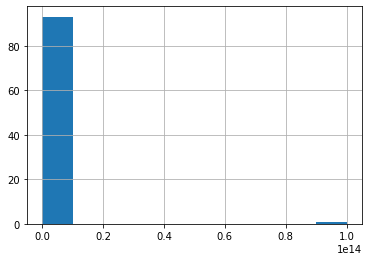

In [53]:
df_imdb.gross.hist()

In [54]:
df_imdb[df_imdb["gross"] < 0]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
51,Color,Zack Snyder,143,-1532,Action|Adventure|Fantasy|Sci-Fi,man of steel,2013,English,USA,"USD 225,000,000.00",7.2,"Henry Cavill,Christopher Meloni,Harry Lennix",118000,1000
92,Color,Sadyk Sher-Niyaz,135,-92939,Action|Biography|Drama|History,queen of the mountains,2014,English,Kyrgyzstan,"USD 1,400,000.00",8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0,1000


In [55]:
df_imdb.loc[df_imdb.gross < 0, "gross"] = recaudacion_mediana

In [56]:
df_imdb[df_imdb["gross"] > 1e9]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
14,Color,F. Gary Gray,167,1.000000e+14,Biography|Crime|Drama|History|Music,straight outta compton,2015,English,USA,"USD 28,000,000.00",7.9,"Aldis Hodge,Neil Brown Jr.,R. Marcos Taylor",76000,1000


In [57]:
df_imdb.loc[df_imdb.gross >= 1e9, "gross"] = recaudacion_mediana

In [58]:
df_imdb.gross.describe()

count    9.400000e+01
mean     1.425250e+08
std      1.270556e+08
min      4.122900e+04
25%      4.859932e+07
50%      1.061603e+08
75%      1.970535e+08
max      6.232795e+08
Name: gross, dtype: float64

<AxesSubplot:>

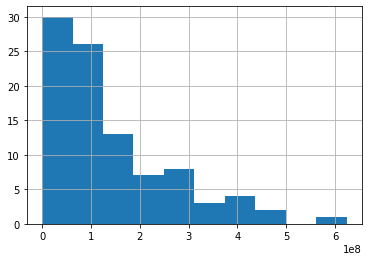

In [59]:
df_imdb.gross.hist()

In [60]:
assert df_imdb.gross.isna().any() == False
assert (df_imdb.gross < 0).any() == False
assert (df_imdb.gross >= 1e9).any() == False

### Columna `genres`


In [61]:
df_imdb["genres"].isnull().any()

True

In [62]:
df_imdb["genres"].value_counts(dropna=False)

Action|Adventure|Sci-Fi                     9
Drama                                       5
Crime|Drama|Thriller                        5
Biography|Drama|History                     4
Drama|Romance                               3
Adventure|Fantasy                           3
Action|Adventure|Thriller                   3
Crime|Drama|Mystery|Thriller                3
Action|Adventure|Fantasy|Sci-Fi             2
Adventure|Drama|History                     2
Action|Adventure|Fantasy                    2
Drama|Musical|Romance                       2
Adventure|Drama|Sci-Fi                      2
Drama|History|Thriller                      2
Action|Adventure|Drama                      2
Biography|Drama|Sport|War                   2
Action|Adventure|Sci-Fi|Thriller            2
Crime|Drama                                 2
Adventure|Drama|Sci-Fi|Thriller             1
Adventure|Sci-Fi|Thriller                   1
Mystery|Thriller                            1
Crime|Drama|Mystery|Thriller|Weste

In [63]:
# Opcion 1 (explode)

In [64]:
df_imdb.genres.str.split("|").explode()

0     Biography
0        Comedy
0         Crime
0         Drama
1        Action
        ...    
97          War
98    Biography
98        Drama
98        Music
98      Musical
Name: genres, Length: 278, dtype: object

In [65]:
df_imdb.genres.str.split("|").explode().value_counts(dropna=False)

Drama        61
Adventure    36
Action       30
Thriller     28
Sci-Fi       22
Crime        17
Biography    15
History      13
Fantasy       9
Romance       8
Mystery       7
War           7
Comedy        7
Western       5
Musical       4
Music         3
Sport         3
Horror        1
Animation     1
NaN           1
Name: genres, dtype: int64

In [66]:
df_imdb_prueba = df_imdb.copy()
df_imdb_prueba["genres"] = df_imdb["genres"].str.split("|")

In [67]:
df_imdb_prueba.explode("genres")

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,116866727.0,Biography,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
0,Color,Martin Scorsese,240,116866727.0,Comedy,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
0,Color,Martin Scorsese,240,116866727.0,Crime,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
0,Color,Martin Scorsese,240,116866727.0,Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,408992272.0,Action,iron man 3,2013,English,USA,"USD 200,000,000.00",7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Color,David Ayer,134,85707116.0,War,fury,2014,English,USA,"USD 68,000,000.00",7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000,1000
98,Color,Clint Eastwood,5,47034272.0,Biography,jersey boys,2014,English,USA,"USD 40,000,000.00",6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000,1000
98,Color,Clint Eastwood,5,47034272.0,Drama,jersey boys,2014,English,USA,"USD 40,000,000.00",6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000,1000
98,Color,Clint Eastwood,5,47034272.0,Music,jersey boys,2014,English,USA,"USD 40,000,000.00",6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000,1000


In [68]:
# Opcion 2 (dividir en varias columnas)
generos_en_columnas = df_imdb["genres"].str.split("|", n=4, expand=True)
generos_en_columnas

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,None
1,Action,Adventure,Sci-Fi,None,None
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,None,None,None,None
4,Adventure,Fantasy,None,None,None
...,...,...,...,...,...
94,Biography,Drama,History,None,None
95,Comedy,Drama,None,None,None
96,Biography,Drama,Thriller,None,None
97,Action,Drama,War,None,None


In [69]:
df_imdb["genero_1"] = generos_en_columnas[0]
df_imdb["genero_2"] = generos_en_columnas[1]
df_imdb["genero_3"] = generos_en_columnas[2]
df_imdb["genero_4"] = generos_en_columnas[3]
df_imdb["genero_5"] = generos_en_columnas[4]

In [70]:
df_imdb.head().T

,0,1,2,3,4
color,Color,Color,Color,Color,Color
director_name,Martin Scorsese,Shane Black,Quentin Tarantino,Kenneth Lonergan,Peter Jackson
duration,240,195,187,186,186
gross,116866727.0,408992272.0,54116191.0,46495.0,258355354.0
genres,Biography|Comedy|Crime|Drama,Action|Adventure|Sci-Fi,Crime|Drama|Mystery|Thriller|Western,Drama,Adventure|Fantasy
movie_title,the wolf of wall street,iron man 3,the hateful eight,margaret,the hobbit: the desolation of smaug
title_year,2013,2013,2015,2011,2013
language,English,English,English,English,English
country,USA,USA,USA,usa,USA
budget,"USD 100,000,000.00","USD 200,000,000.00","USD 44,000,000.00","USD 14,000,000.00","USD 225,000,000.00"


### Columna `budget`

In [71]:
df_imdb.budget

0     USD 100,000,000.00
1     USD 200,000,000.00
2      USD 44,000,000.00
3      USD 14,000,000.00
4     USD 225,000,000.00
             ...        
94     USD 20,000,000.00
95               USD nan
96     USD 55,000,000.00
97     USD 68,000,000.00
98     USD 40,000,000.00
Name: budget, Length: 94, dtype: object

In [72]:
df_imdb.budget.value_counts(dropna=False)

USD 250,000,000.00    6
USD 40,000,000.00     5
USD 100,000,000.00    5
USD 200,000,000.00    5
USD 50,000,000.00     5
USD 25,000,000.00     4
USD nan               4
USD 61,000,000.00     3
USD 65,000,000.00     3
USD 225,000,000.00    2
USD 160,000,000.00    2
USD 125,000,000.00    2
USD 20,000,000.00     2
USD 32,000,000.00     2
USD 35,000,000.00     2
USD 105,000,000.00    1
USD 22,000,000.00     1
USD 46,000,000.00     1
USD 60,000,000.00     1
USD 17,350.00         1
USD 15,000,000.00     1
USD 140,000,000.00    1
USD 75,000,000.00     1
USD 70,000,000.00     1
USD 31,000,000.00     1
USD 4,000,000.00      1
USD 130,000,000.00    1
USD 55,000,000.00     1
USD 85,000,000.00     1
USD 190,000,000.00    1
USD 230,000,000.00    1
USD 135,000,000.00    1
USD 66,000,000.00     1
USD 14,000,000.00     1
USD 180,000,000.00    1
USD 25,500,000.00     1
USD 220,000,000.00    1
USD 68,000,000.00     1
USD 1,400,000.00      1
USD 90,000,000.00     1
USD 78,000,000.00     1
USD 210,000,000.

In [73]:
df_imdb["budget"] = df_imdb.budget.str.replace("USD", "").str.replace(",", "")

In [74]:
df_imdb.loc[df_imdb.budget.str.strip().str.match("nan"), "budget"] = np.nan

In [75]:
df_imdb["budget"] = np.where(~df_imdb["budget"].isna(), df_imdb["budget"].str[:-3], df_imdb["budget"])
df_imdb["budget"] = df_imdb.budget.astype(float)

<AxesSubplot:>

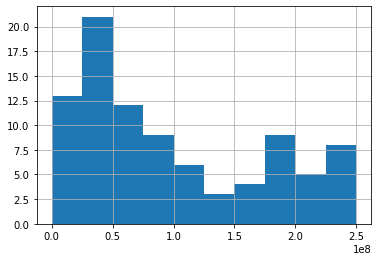

In [76]:
df_imdb.budget.hist()

In [77]:
presupuesto_promedio = df_imdb.budget.mean()
df_imdb.loc[df_imdb.budget.isna(), "budget"] = presupuesto_promedio

<AxesSubplot:>

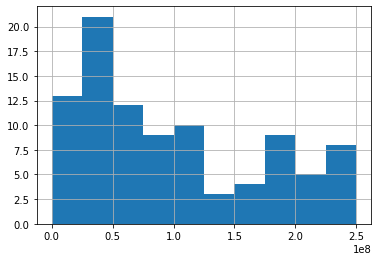

In [78]:
df_imdb.budget.hist()

<AxesSubplot:xlabel='gross', ylabel='budget'>

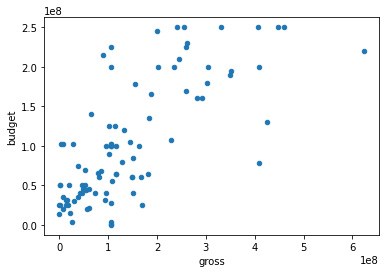

In [79]:
df_imdb.plot.scatter(x="gross", y="budget")

In [80]:
df_imdb[["gross", "budget"]].corr()

,gross,budget
gross,1.000000,0.728868
budget,0.728868,1.000000


In [ ]:
df_imdb["gross_budget_ratio"] = df_imdb.gross / df_imdb.budget

In [ ]:
def identify_films(gross, rating):
    if gross > 150_000_000 and rating < 6.5:
        return "High gross, low rating"
    if gross < 80_000_000 and rating > 8:
        return "Low gross, high rating"
    return "Normal"

identify_films(180_000_000, 4)

In [ ]:
df_imdb["type_film"] = df_imdb.apply(lambda row: identify_films(row["gross"], row["imdb_score"]), axis=1)

In [ ]:
df_imdb.type_film.value_counts()

## Guardar dataset

In [ ]:
df_imdb.to_csv("data/imdb_limpio.csv", index=False)

## Otras columnas

### Columna `duration`

In [81]:
df_imdb.duration

0     240
1     195
2     187
3     186
4     186
     ... 
94    134
95    134
96    134
97    134
98      5
Name: duration, Length: 94, dtype: int64

In [82]:
df_imdb.duration.value_counts(dropna=False)

 138    6
 141    6
 137    6
 136    5
 143    5
 134    4
 146    4
 144    4
 148    4
 140    4
 139    4
 142    3
 158    3
 150    3
 153    3
 186    2
 165    2
 164    2
 156    2
 135    2
 149    2
 195    1
 187    1
 173    1
 580    1
 240    1
 183    1
 180    1
-50     1
 5      1
 172    1
 170    1
 169    1
 167    1
 157    1
 151    1
 147    1
 650    1
 154    1
Name: duration, dtype: int64

In [83]:
df_imdb.duration.isna().any()

False

In [84]:
df_imdb.duration.describe()

count     94.000000
mean     155.787234
std       74.666840
min      -50.000000
25%      138.000000
50%      143.500000
75%      155.500000
max      650.000000
Name: duration, dtype: float64

<AxesSubplot:>

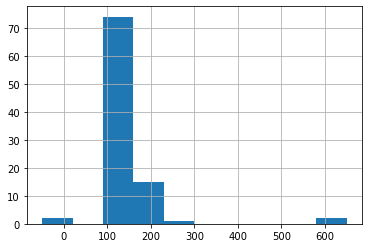

In [85]:
df_imdb.duration.hist()

In [86]:
df_imdb[df_imdb.duration < 30]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5
6,Color,Peter Jackson,-50,303001229.0,Adventure|Fantasy,the hobbit: an unexpected journey,2012,English,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000,1000,Adventure,Fantasy,None,None,None
98,Color,Clint Eastwood,5,47034272.0,Biography|Drama|Music|Musical,jersey boys,2014,English,USA,40000000.0,6.9,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000,1000,Biography,Drama,Music,Musical,None


In [87]:
duracion_media = round(df_imdb.duration.mean())
duracion_media

156

In [88]:
df_imdb.loc[df_imdb.duration < 30, "duration"] = duracion_media

In [89]:
df_imdb.loc[df_imdb.duration > 300, "duration"] = duracion_media

<AxesSubplot:>

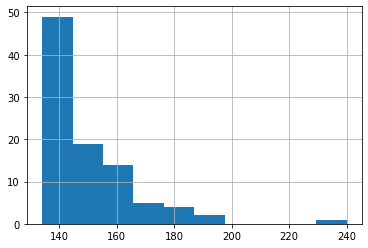

In [90]:
df_imdb.duration.hist()

### Columna `movie_title`

In [92]:
df_imdb.movie_title.value_counts(dropna=False)

ben-hur                       2
les misérables                2
unbroken                      2
the wolverine                 1
prisoners                     1
                             ..
rock of ages                  1
gone girl                     1
the martian                   1
the place beyond the pines    1
spectre                       1
Name: movie_title, Length: 91, dtype: int64

In [93]:
pd.set_option("display.max_rows", None)
print(df_imdb.movie_title.value_counts(dropna=False))

ben-hur                                        2
les misérables                                 2
unbroken                                       2
the wolverine                                  1
prisoners                                      1
flight                                         1
jersey boys                                    1
get on up                                      1
captain phillips                               1
ramanujan                                      1
margaret                                       1
robin hood                                     1
the hunger games: catching fire                1
furious 7                                      1
cloud atlas                                    1
warrior                                        1
transformers: dark of the moon                 1
zero dark thirty                               1
the amazing spider-man                         1
the amazing spider-man 2                       1
the master          

In [94]:
pd.reset_option("display.max_rows")

In [95]:
df_imdb.movie_title.isna().any()

False

In [96]:
df_imdb[df_imdb.movie_title.str.len() < 5]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5
77,Color,Darren Aronofsky,138,101160529.0,Action|Adventure|Drama,noah,2014,English,USA,125000000.0,5.8,"Anthony Hopkins,Emma Watson,Logan Lerman",71000,1000,Action,Adventure,Drama,None,None
97,Color,David Ayer,134,85707116.0,Action|Drama|War,fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000,1000,Action,Drama,War,None,None


In [97]:
df_imdb["movie_title"] = df_imdb.movie_title.str.title()

In [98]:
df_imdb.movie_title.head()

0                The Wolf Of Wall Street
1                             Iron Man 3
2                      The Hateful Eight
3                               Margaret
4    The Hobbit: The Desolation Of Smaug
Name: movie_title, dtype: object

### Columna `title_year`

In [99]:
df_imdb.title_year.value_counts(dropna=False)

 2014    22
 2012    19
 2013    17
 2011    10
 2015     8
 2010     7
 2016     6
 1800     1
 202      1
 205      1
-1000     1
 2030     1
Name: title_year, dtype: int64

In [100]:
filtro = (df_imdb.title_year > 1950) & (df_imdb.title_year < 2021)
df_imdb.title_year[filtro]
df_imdb.loc[~filtro, "title_year"] = round(df_imdb.title_year[filtro].mean())

In [101]:
df_imdb.title_year.value_counts(dropna=False)

2013    22
2014    22
2012    19
2011    10
2015     8
2010     7
2016     6
Name: title_year, dtype: int64

### Columna `movie_twitter_likes`

<AxesSubplot:>

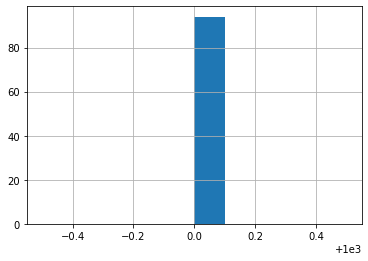

In [102]:
df_imdb.movie_twitter_likes.hist()

In [103]:
df_imdb.movie_twitter_likes.value_counts(dropna=False)

1000    94
Name: movie_twitter_likes, dtype: int64

In [104]:
df_imdb.drop("movie_twitter_likes", axis=1, inplace=True)

### Columna `imdb_score`

<AxesSubplot:>

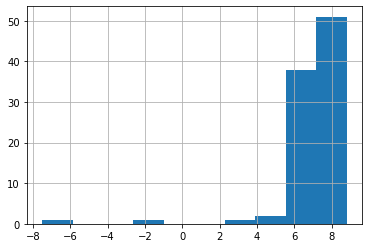

In [105]:
df_imdb.imdb_score.hist()

In [106]:
filtro = df_imdb.imdb_score < 0
score_medio = df_imdb.imdb_score[~filtro].mean()
df_imdb.loc[df_imdb.imdb_score < 0, "imdb_score"] = score_medio

### Columna `country`

In [107]:
df_imdb.country.value_counts(dropna=False)

USA               75
UK                 6
usa                3
France             2
United States      1
Canada             1
Germany            1
Czech Republic     1
India              1
Kyrgyzstan         1
New Zealand        1
Australia          1
Name: country, dtype: int64

In [108]:
df_imdb.loc[df_imdb.country.str.lower() == "usa", "country"] = "United States"

In [109]:
df_imdb.loc[df_imdb.country == "UK", "country"] = "United Kingdom"

In [110]:
df_imdb.country.value_counts(dropna=False)

United States     79
United Kingdom     6
France             2
Germany            1
Czech Republic     1
India              1
Kyrgyzstan         1
Australia          1
Canada             1
New Zealand        1
Name: country, dtype: int64

### Columna `language`

In [111]:
df_imdb.language.value_counts(dropna=False)

English    94
Name: language, dtype: int64

### Columna `movie_facebook_likes`

<AxesSubplot:>

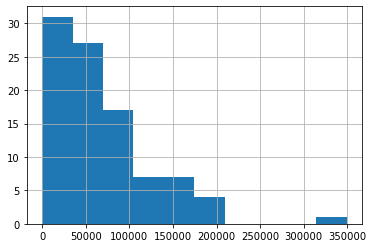

In [112]:
df_imdb.movie_facebook_likes.hist()

In [113]:
df_imdb.movie_facebook_likes.isna().any()

False

In [114]:
df_imdb.movie_facebook_likes.describe()

count        94.000000
mean      65633.244681
std       58702.022178
min           0.000000
25%       24500.000000
50%       54000.000000
75%       84500.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

### Columna `actors`

In [115]:
df_imdb.actors.str.split(",").explode().value_counts()

Leonardo DiCaprio     7
Jennifer Lawrence     6
Hugh Jackman          5
Tom Hardy             5
Robert Downey Jr.     5
                     ..
B.J. Novak            1
Bruce McGill          1
Anthony Reynolds      1
James Badge Dale      1
John Gallagher Jr.    1
Name: actors, Length: 209, dtype: int64